 ### Семинар 6
 # Случайный лес

**Случайный лес** (Random forest) — это модель машинного обучения, объединяющая некоторое количество решающих деревьев в одну композицию (ансамбль), за счет чего улучшается их качество работы и обобщающая способность. Деревья строятся независимо друг от друга. Чтобы они отличались друг от друга, обучение проводится бутстрэпированном подмножестве.

Метод бутстрэпа заключается в следующем. Пусть имеется выборка $\large X$ размера $\large N$. Равномерно возьмем из выборки $\large N$ объектов с возвращением. 

Также, для дальнейшего уменьшения схожести деревьев, оптимальный признак для разбиения выбирается не из всех возможных признаков, а лишь из их случайного подмножества. Прогнозы, выданные деревьями, объединяются в один ответ путем усреднения в случае регрессии и мажоритарным голосованием в случае классификации.

Особенность случайного леса заключается в том, что он не переобучается по мере увеличения количества деревьев в композиции. Это достигается за счет того, что деревья не зависят друг от друга, и поэтому добавление нового дерева в композицию не усложняет модель, а лишь понижает уровень шума в прогнозах.

Случайные леса для задач классификации и регрессии в библиотеке `Scikit-learn` представлены классами `RandomForestClassifier` и `RandomForestRegressor`. Основными гиперпараметрами моделей являются:

`n_estimators` - число деревьев в ансамбле

`criterion` - критерий для разбиения выборки в вершине

`max_features` - число признаков для построения одного дерева

`min_samples_leaf` - минимальное число объектов в листе (рекомендуется устанавливать равным 1 для классификации и равным 5 для регрессии)

`max_depth` - максимальная глубина дерева


Импортируем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

 ### 1. Загрузите встроенный датасет load_breast_cancer. Обозначьте признаки за X, а целевую переменную за y и выведите их размеры. Выведите данные в виде датафрейма.

In [2]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X.shape, y.shape

((569, 30), (569,))

In [3]:
data = pd.DataFrame(X, columns=cancer.feature_names)
data['target'] = y
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


 ### 2. Разделите данные на обучающую и тестовую части в соотношении 4:1, зафиксировав random_state=42. Выведите получившиеся размеры обучающей и тестовой выборок. 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape[0], X_test.shape[0]

(455, 114)

 ### 3. Обучите на обучающих данных модель классификационного решающего дерева с параметрами по умолчанию, зафиксировав только random_state=42. Выведите знасение метрики accuracy на тестовых данных.

In [5]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
tree_clf.score(X_test, y_test)

0.9473684210526315

 ### 4. Обучите на обучающих данных модель классификационного случайного леса из 30 деревьев, зафиксировав random_state=42. Выведите знасение метрики accuracy на тестовых данных. Сделайте вывод о том, какая модель лучше осуществляет классификацию для этих данных: решающее дерево или случайный лес из 30 деревьев. Выведите список базовых алгоритмов деревьев, участвующих в модели леса при помощи атрибута .estimators_.

In [6]:
forest_clf = RandomForestClassifier(n_estimators=30, random_state=42)
forest_clf.fit(X_train, y_train)
forest_clf.score(X_test, y_test)

0.9649122807017544

In [7]:
forest_clf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1608637542),
 DecisionTreeClassifier(max_features='sqrt', random_state=1273642419),
 DecisionTreeClassifier(max_features='sqrt', random_state=1935803228),
 DecisionTreeClassifier(max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_features='sqrt', random_state=1201263687),
 DecisionTreeClassifier(max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_features='sqrt', random_state=1914837113),
 DecisionTreeClassifier(max_features='sqrt', random_state=669991378),
 DecisionTreeClassifier(max_features='sqrt', random_state=429389014),
 DecisionTreeClassifier(max_features='sqrt', random_state=249467210),
 DecisionTreeClassifier(max_features='sqrt', random_state=1972458954),
 DecisionTreeC

 ### 5. Исследуйте на переобученность построенные модели дерева решений и случайного леса с 30 деревьями. Для этого осуществите кросс-валидацию с 10 итерациями.

In [8]:
cv_results = cross_validate(tree_clf, X_train, y_train, cv = 10, scoring='accuracy', return_train_score=True)

In [9]:
scores = pd.DataFrame(cv_results)[['train_score','test_score']]
scores

,train_score,test_score
0,1.0,0.913043
1,1.0,0.934783
2,1.0,0.978261
3,1.0,0.847826
4,1.0,0.934783
5,1.0,0.977778
6,1.0,0.911111
7,1.0,0.955556
8,1.0,0.977778
9,1.0,0.866667


In [10]:
scores.mean()

train_score    1.000000
test_score     0.929758
dtype: float64

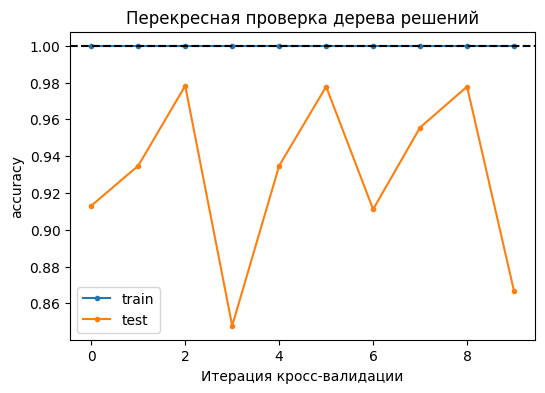

In [11]:
plt.figure(figsize=(6,4))
plt.plot(scores['train_score'], label = 'train', marker = '.')
plt.plot(scores['test_score'], label = 'test', marker = '.')
plt.axhline(y = 1, color ='black', ls = 'dashed')
plt.legend()
plt.title("Перекресная проверка дерева решений")
plt.xlabel("Итерация кросс-валидации")
plt.ylabel("accuracy")
plt.show()

In [12]:
cv_results = cross_validate(forest_clf, X_train, y_train, cv = 10, scoring='accuracy', return_train_score=True)
scores = pd.DataFrame(cv_results)[['train_score','test_score']]
scores

,train_score,test_score
0,0.997555,1.000000
1,0.997555,0.978261
2,0.997555,1.000000
3,1.000000,0.934783
4,0.997555,0.978261
5,0.995122,0.977778
6,0.995122,0.955556
7,0.995122,0.933333
8,0.997561,0.977778
9,1.000000,0.933333


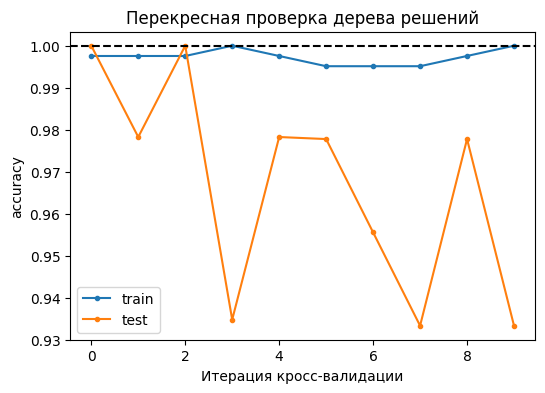

In [13]:
plt.figure(figsize=(6,4))
plt.plot(scores['train_score'], label = 'train', marker = '.')
plt.plot(scores['test_score'], label = 'test', marker = '.')
plt.axhline(y = 1, color ='black', ls = 'dashed')
plt.legend()
plt.title("Перекресная проверка дерева решений")
plt.xlabel("Итерация кросс-валидации")
plt.ylabel("accuracy")
plt.show()

 ### 6. Посмотрите на поведение модели случайного леса при росте числа деревьев. Для этого постройте кривую проверки в зависимости от числа деревьев от 1 до 100. При этом количество итераций кросс-валидации возьмите равным трём.

In [14]:
estimators = np.arange(1, 101)

In [15]:
train_scores, test_scores = validation_curve(RandomForestClassifier(random_state=42), X_train, y_train, param_name='n_estimators',
                                             param_range=estimators, cv=3, scoring='accuracy', n_jobs=-1)

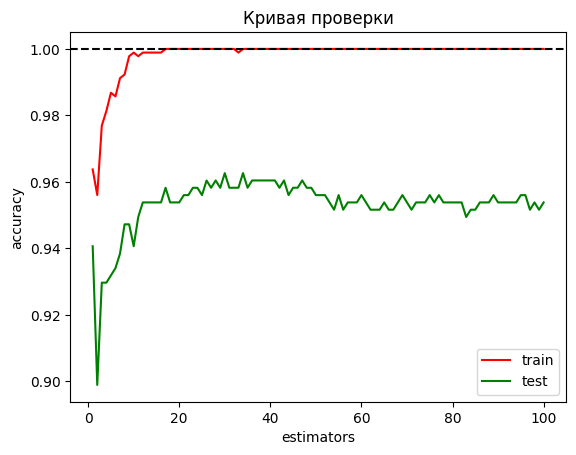

In [16]:
plt.plot(estimators, train_scores.mean(axis=1), label='train', color = 'red')
plt.plot(estimators, test_scores.mean(axis=1), label='test', color = 'green')
plt.axhline(y = 1, color ='black', ls = 'dashed')
plt.legend()
plt.title("Кривая проверки")
plt.xlabel("estimators")
plt.ylabel("accuracy")
plt.show()

 ### 7. Определите степени важности признаков, используя атрибут .feature_importances_. Выберите два наиболее важных признака. 

In [17]:
forest_clf.feature_importances_

array([0.06339443, 0.01782578, 0.04488739, 0.0471399 , 0.00596547,
       0.02368214, 0.08825431, 0.14034634, 0.00417946, 0.00460026,
       0.0387992 , 0.00480886, 0.00841159, 0.05123942, 0.00352245,
       0.0035935 , 0.00897903, 0.00597533, 0.00460855, 0.00611368,
       0.04932543, 0.01834412, 0.05172104, 0.10617421, 0.0080019 ,
       0.02568527, 0.01566631, 0.13561429, 0.00625461, 0.00688574])

<function matplotlib.pyplot.show(close=None, block=None)>

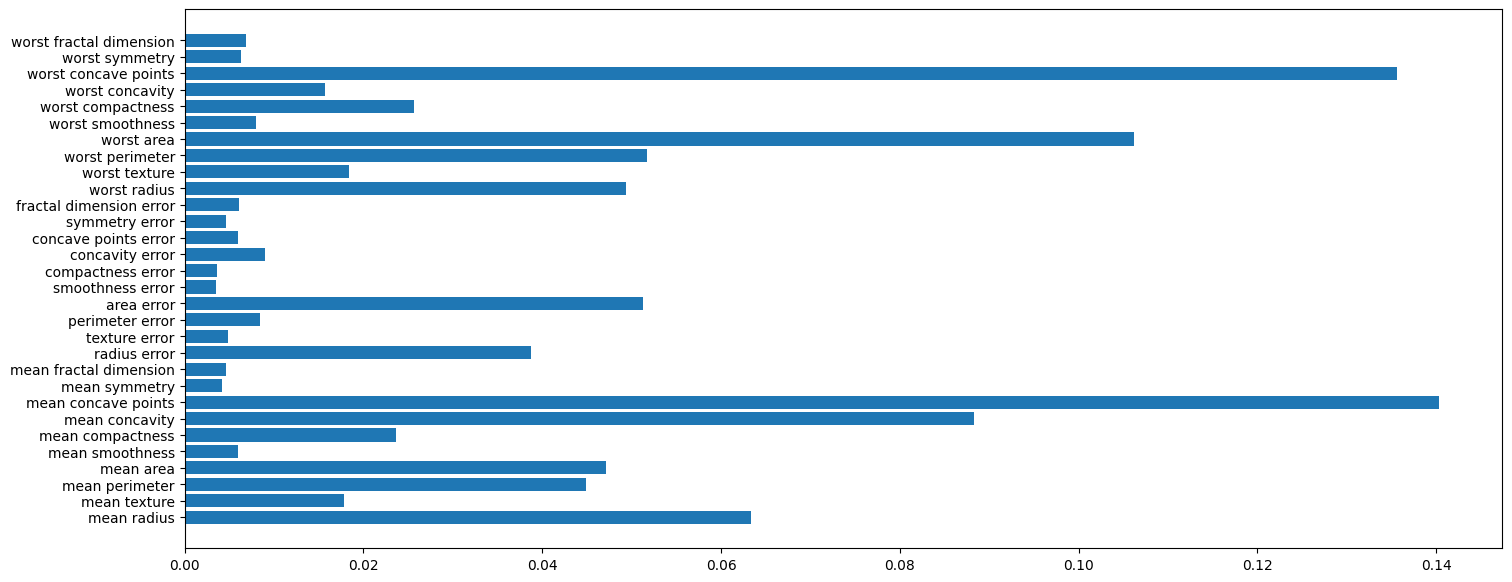

In [18]:
plt.figure(figsize= (17, 7))
plt.barh(cancer.feature_names, forest_clf.feature_importances_)
plt.show

 ### 8. Используя только два наиболее важных признака, разбейте данные на обучающую и тестовую части. Обучите на обучающих данных модель классификационного случайного леса из 30 деревьев, зафиксировав random_state=42. Выведите знасение метрики accuracy на тестовых данных. Визуализируйте области разделения на классы для тестовых данных и диаграмму рассеивания тестовых данных на одном графике.

In [40]:
X_best = cancer.data[:, [7, 27]]
X_train_best, X_test_best, y_train, y_test = train_test_split(X_best, y, test_size=0.2, random_state=42)
X_train_best.shape, X_test_best.shape

((455, 2), (114, 2))

In [41]:
model = RandomForestClassifier(n_estimators=30, random_state=42)
model.fit(X_train_best, y_train)

RandomForestClassifier(n_estimators=30, random_state=42)

In [42]:
y_pred = model.predict(X_test_best)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8859649122807017

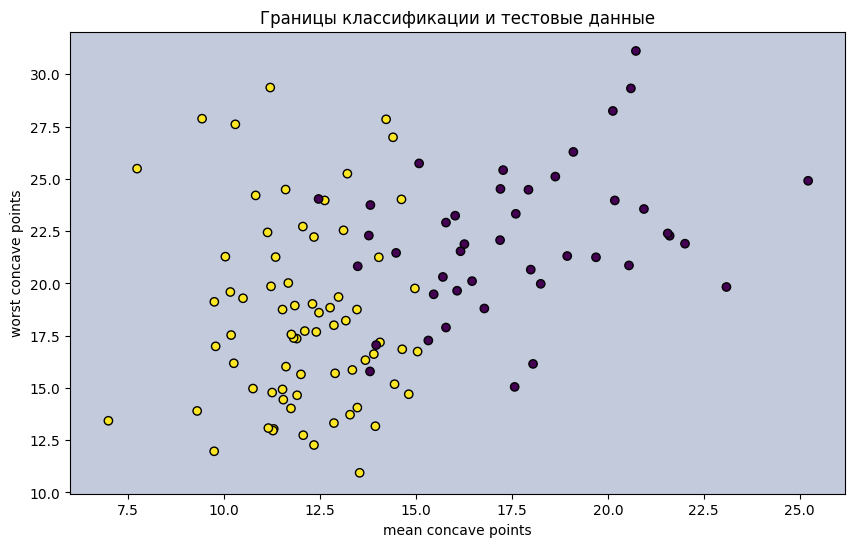

In [43]:
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k')
plt.xlabel(cancer.feature_names[7])
plt.ylabel(cancer.feature_names[27])
plt.title("Границы классификации и тестовые данные")
plt.show()

 # Задания для самостоятельного выполнения:

 ### 1. Загрузите данные об уровне заработной платы multiple_linear_regression_dataset.csv. Обозначьте признаки за X, а целевую переменную income за y и выведите их размеры. Выведите данные в виде датафрейма.

In [44]:
df = pd.read_csv('multiple_linear_regression_dataset.csv')
X = df.drop('income', axis=1)
y = df['income'] 
X.shape, y.shape

((20, 2), (20,))

In [45]:
df

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


 ### 2. Разделите данные на обучающую и тестовую части в соотношении 4:1, зафиксировав random_state=42. Выведите получившиеся размеры обучающей и тестовой выборок.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape[0], X_test.shape[0]

(16, 4)

 ### 3. Обучите на обучающих данных модель регрессионного решающего дерева с параметрами по умолчанию, зафиксировав только random_state=42. Выведите значение метрики RMSE на тестовых данных.

In [55]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)
root_mean_squared_error(y_test, y_pred)

2938.690184418902

 ### 4. Обучите на обучающих данных модель регрессионного случайного леса из 80 деревьев, зафиксировав random_state=42. Выведите значение метрики RMSE на тестовых данных. Сделайте вывод о том, какая модель лучше осуществляет регрессию для этих данных: решающее дерево или случайный лес из 80 деревьев. Выведите список базовых алгоритмов деревьев, участвующих в модели леса при помощи атрибута .estimators_.

In [56]:
forest_reg = RandomForestRegressor(n_estimators=80, random_state=42)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)
root_mean_squared_error(y_test, y_pred)

1841.4233699352656

In [52]:
forest_reg.estimators_

[DecisionTreeRegressor(max_features=1.0, random_state=1608637542),
 DecisionTreeRegressor(max_features=1.0, random_state=1273642419),
 DecisionTreeRegressor(max_features=1.0, random_state=1935803228),
 DecisionTreeRegressor(max_features=1.0, random_state=787846414),
 DecisionTreeRegressor(max_features=1.0, random_state=996406378),
 DecisionTreeRegressor(max_features=1.0, random_state=1201263687),
 DecisionTreeRegressor(max_features=1.0, random_state=423734972),
 DecisionTreeRegressor(max_features=1.0, random_state=415968276),
 DecisionTreeRegressor(max_features=1.0, random_state=670094950),
 DecisionTreeRegressor(max_features=1.0, random_state=1914837113),
 DecisionTreeRegressor(max_features=1.0, random_state=669991378),
 DecisionTreeRegressor(max_features=1.0, random_state=429389014),
 DecisionTreeRegressor(max_features=1.0, random_state=249467210),
 DecisionTreeRegressor(max_features=1.0, random_state=1972458954),
 DecisionTreeRegressor(max_features=1.0, random_state=1572714583),
 De

 ### 5. Исследуйте на переобученность построенные модели дерева решений и случайного леса с 80 деревьями. Для этого осуществите кросс-валидацию с 5 итерациями.

In [85]:
tree_cv_results = cross_validate(tree_reg, X_train, y_train, cv = 5, scoring='neg_mean_squared_error', return_train_score=True)


In [87]:
scores = pd.DataFrame(tree_cv_results)[['train_score','test_score']]
-scores.mean()

train_score   -0.000000e+00
test_score     2.402061e+07
dtype: float64

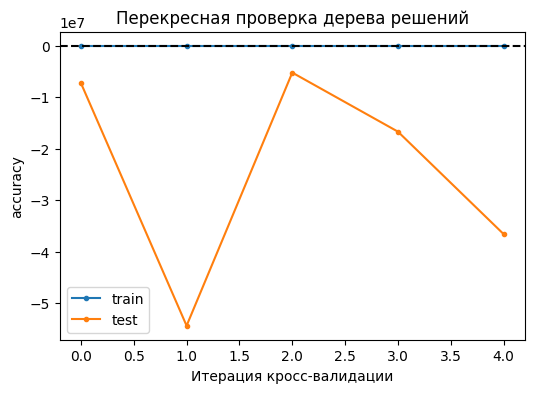

In [88]:
plt.figure(figsize=(6,4))
plt.plot(scores['train_score'], label = 'train', marker = '.')
plt.plot(scores['test_score'], label = 'test', marker = '.')
plt.axhline(y = 1, color ='black', ls = 'dashed')
plt.legend()
plt.title("Перекресная проверка дерева решений")
plt.xlabel("Итерация кросс-валидации")
plt.ylabel("accuracy")
plt.show()

In [90]:
forest_cv_results = cross_validate(forest_reg, X_train, y_train, cv = 5, scoring='neg_mean_squared_error', return_train_score=True)

In [91]:
scores = pd.DataFrame(forest_cv_results)[['train_score','test_score']]
-scores.mean()

train_score    3.593202e+06
test_score     2.097384e+07
dtype: float64

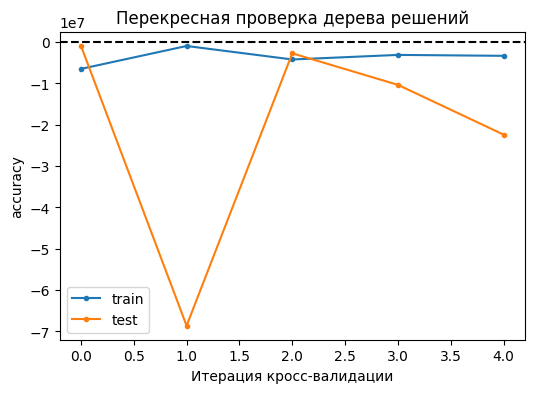

In [92]:
plt.figure(figsize=(6,4))
plt.plot(scores['train_score'], label = 'train', marker = '.')
plt.plot(scores['test_score'], label = 'test', marker = '.')
plt.axhline(y = 1, color ='black', ls = 'dashed')
plt.legend()
plt.title("Перекресная проверка дерева решений")
plt.xlabel("Итерация кросс-валидации")
plt.ylabel("accuracy")
plt.show()

 ### 6. Посмотрите на поведение модели случайного леса при росте числа деревьев. Для этого постройте кривую проверки в зависимости от числа деревьев от 1 до 100. При этом количество итераций кросс-валидации возьмите равным трём.

In [93]:
estimators = np.arange(1, 101)

In [94]:
train_scores, test_scores = validation_curve(RandomForestRegressor(random_state=42), X_train, y_train, param_name='n_estimators',
                                             param_range=estimators, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

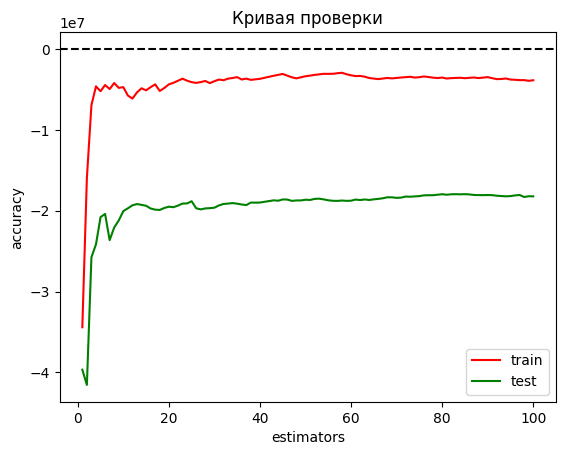

In [95]:
plt.plot(estimators, train_scores.mean(axis=1), label='train', color = 'red')
plt.plot(estimators, test_scores.mean(axis=1), label='test', color = 'green')
plt.axhline(y = 1, color ='black', ls = 'dashed')
plt.legend()
plt.title("Кривая проверки")
plt.xlabel("estimators")
plt.ylabel("accuracy")
plt.show()

 ### 7. Определите степени важности признаков, используя атрибут .feature_importances_. Выберите самый важный признак. 

In [96]:
forest_reg.feature_importances_

array([0.17522525, 0.82477475])

 ###  8. Используя только один наиболее важный признак, разбейте данные на обучающую и тестовую части. Обучите на обучающих данных модель регрессионного случайного леса из 80 деревьев, зафиксировав random_state=42. Выведите значение метрики RMSE на тестовых данных. Визуализируйте ломаную линию регрессии для тестовых данных и диаграмму рассеивания тестовых данных на одном графике.

RMSE на тестовых данных: 1623.98


C:\Users\alexm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


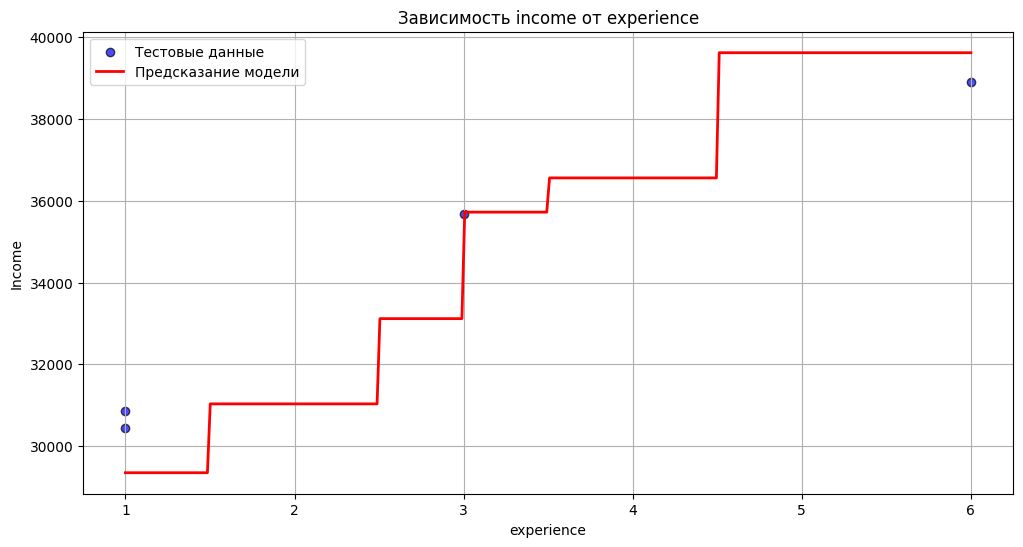

In [103]:
model = RandomForestRegressor(n_estimators=80, random_state=42)
model.fit(X, y)
importances = model.feature_importances_
most_important_feature = X.columns[np.argmax(importances)]

# Использование только одного признака
X_single = df[[most_important_feature]]

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X_single, y, test_size=0.2, random_state=42
)

# Обучение модели
model_single = RandomForestRegressor(n_estimators=80, random_state=42)
model_single.fit(X_train, y_train)

# Расчет RMSE
y_pred = model_single.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE на тестовых данных: {rmse:.2f}")

# Визуализация
x_values = np.linspace(
    X_test[most_important_feature].min(),
    X_test[most_important_feature].max(),
    300
).reshape(-1, 1)
y_pred_plot = model_single.predict(x_values)

plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, c='blue', edgecolor='k', label='Тестовые данные', alpha=0.7)
plt.plot(x_values, y_pred_plot, color='red', linewidth=2, label='Предсказание модели')
plt.title(f'Зависимость income от {most_important_feature}')
plt.xlabel(most_important_feature)
plt.ylabel('Income')
plt.legend()
plt.grid(True)
plt.show()